In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
files = files.upload()
df = pd.read_csv("LE.csv")

Saving LE.csv to LE (2).csv


#This is a machine learning project where I used multiple algorithms with a life expectancy dataset. The main goal was using regression algorithms to predict life expectancy based on multiple features, and using classification algorithms to examine feature importance

In [ ]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


#Initial analysis to understand the dataset

In [ ]:
df.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
print(df.columns)
df.shape


Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


(2938, 22)

0.4048767611266022


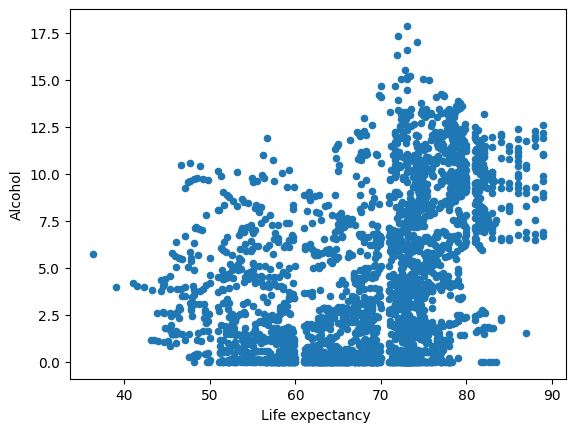

In [ ]:
correlation = df['Life expectancy '].corr(df['Alcohol'])
print(correlation)
df.plot.scatter(x ='Life expectancy ', y = 'Alcohol')
plt.show()

0.4482728294507217


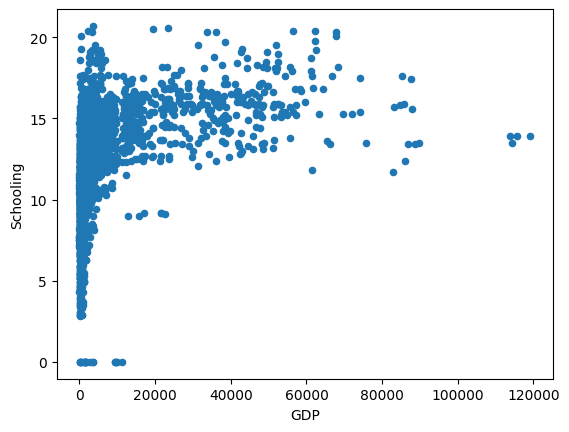

In [ ]:
cr2 = df['GDP'].corr(df['Schooling'])
print(cr2)
df.plot.scatter(x = 'GDP', y = 'Schooling')
plt.show()

<Axes: >

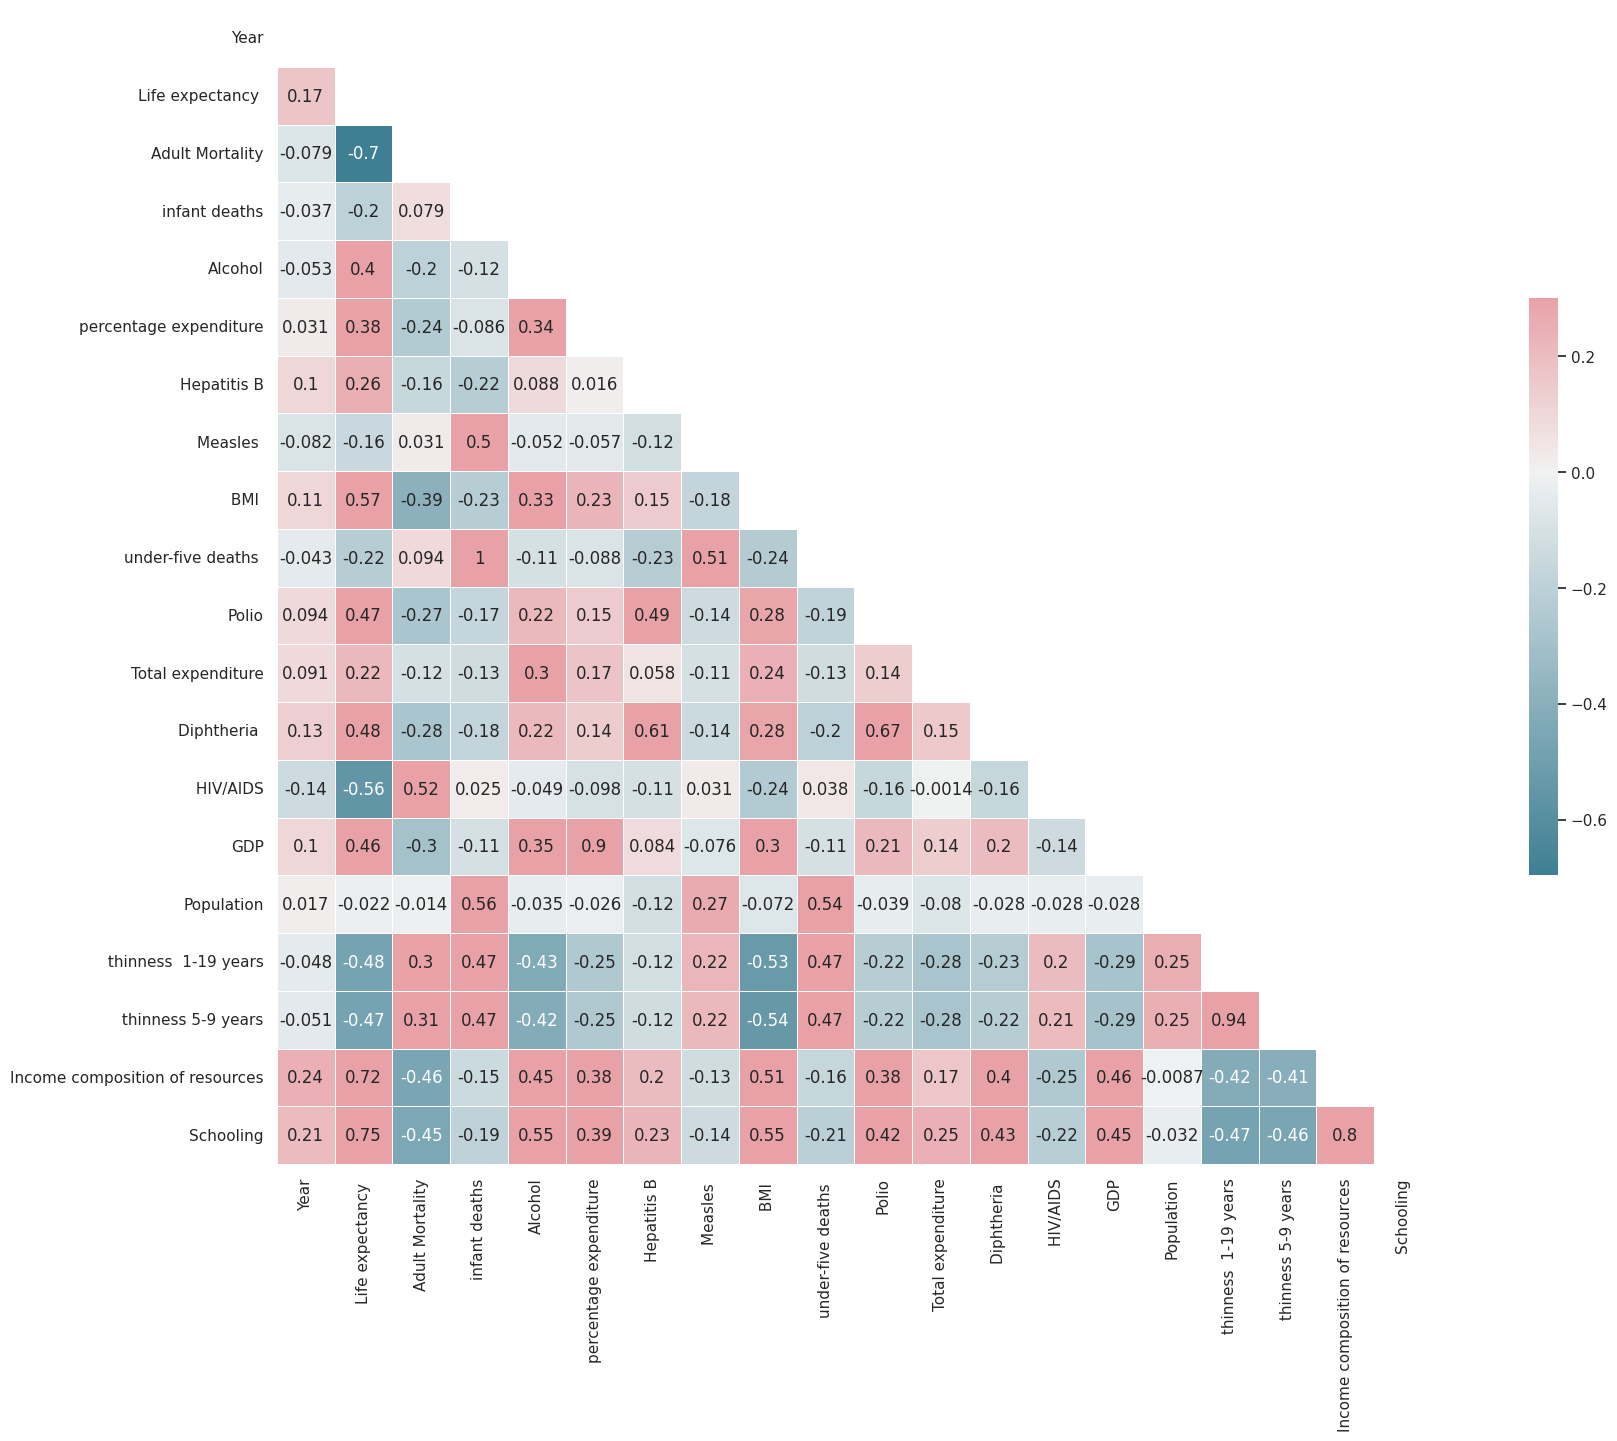

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(style="white")

#dropping categorical features
columns_to_drop = ['Country','Status']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])
corr  = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(25, 15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)



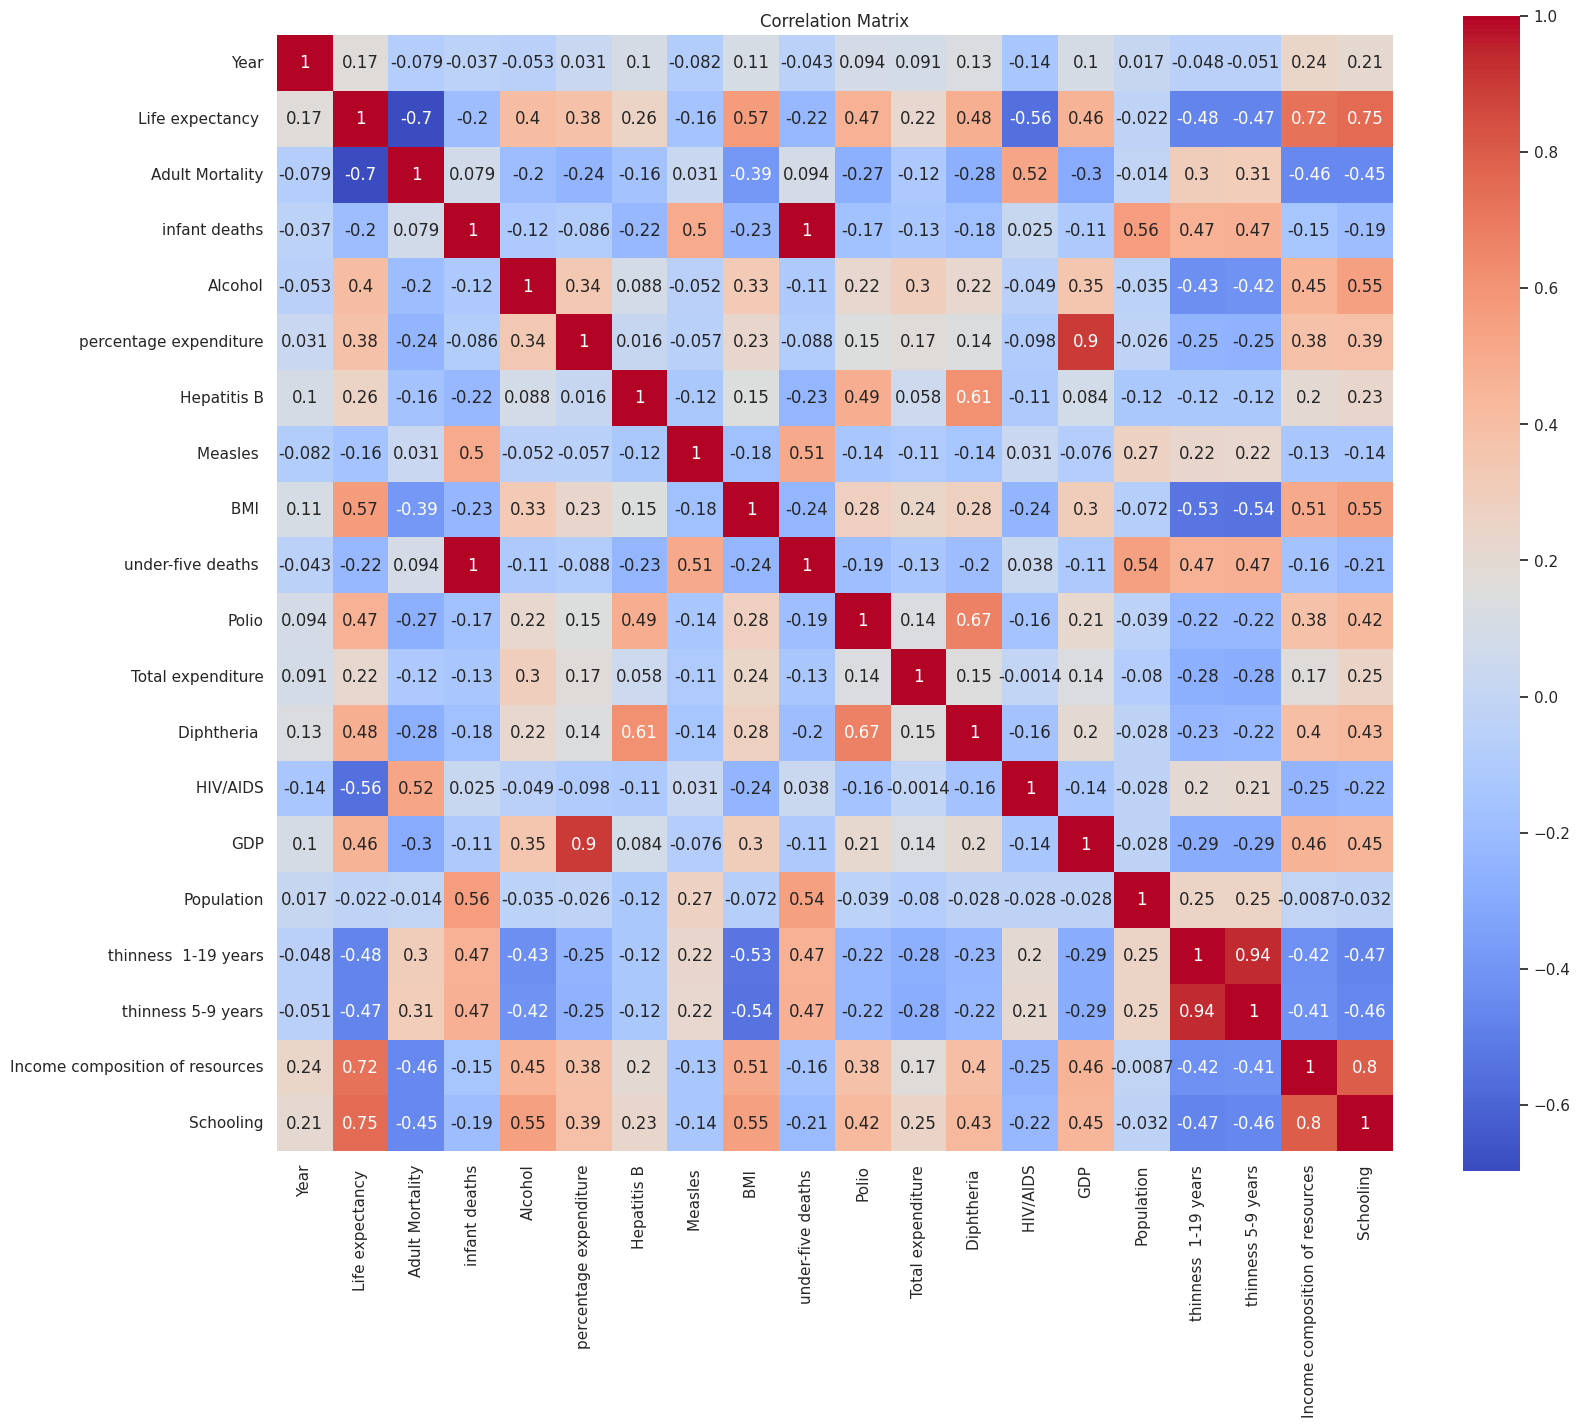

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_drop = ['Country', 'Status']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

corr = df.corr()

plt.figure(figsize=(18, 15))
sns.heatmap(corr, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()


### This correlation matrix was helpful in understanding features that are highly correlated. GDP and percentage expenditure are highly correlated, meaning one should be removed. Same with infant deaths and under five deaths

In [ ]:
df.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


## Understanding the features with the highest positive, negative, and lowest correlation with life expectancy

In [ ]:
df2 = df.drop(['Country', 'Status'], axis = 1)
corr_matrix = df2.corr()

target_feature = 'Life expectancy '

correlations = corr_matrix[target_feature]

sorted_correlations = correlations.sort_values(ascending=False)

top_5_high = sorted_correlations[1:6]
print("Top 5 Features with Highest Correlation:")
for feature, corr in top_5_high.items():
    print(f"{feature}, Correlation with '{target_feature}': {corr:.4f}")
print()
top_5_low = sorted_correlations[-5:]
print("Features with highest negative Correlation:")
for feature, corr in top_5_low.items():
    print(f"{feature},Correlation with '{target_feature}': {corr:.4f}")


Top 5 Features with Highest Correlation:
Schooling, Correlation with 'Life expectancy ': 0.7520
Income composition of resources, Correlation with 'Life expectancy ': 0.7248
 BMI , Correlation with 'Life expectancy ': 0.5677
Diphtheria , Correlation with 'Life expectancy ': 0.4795
Polio, Correlation with 'Life expectancy ': 0.4656

Features with highest negative Correlation:
under-five deaths ,Correlation with 'Life expectancy ': -0.2225
 thinness 5-9 years,Correlation with 'Life expectancy ': -0.4716
 thinness  1-19 years,Correlation with 'Life expectancy ': -0.4772
 HIV/AIDS,Correlation with 'Life expectancy ': -0.5566
Adult Mortality,Correlation with 'Life expectancy ': -0.6964


In [ ]:
corr_matrix = df2.corr()

target_feature = 'Life expectancy '

correlations = corr_matrix[target_feature]

sorted_correlations = correlations.sort_values(ascending=False)
sorted_abs_correlations = correlations.abs().sort_values()

closest_to_zero = sorted_abs_correlations[1:6]  # Skip the first (self-correlation)
print("Features with Correlations Closest to Zero:")
for feature, corr in closest_to_zero.items():
    print(f"{feature}, Correlation'{target_feature}': {correlations[feature]:.2f}")


Features with Correlations Closest to Zero:
Measles , Correlation'Life expectancy ': -0.16
Year, Correlation'Life expectancy ': 0.17
infant deaths, Correlation'Life expectancy ': -0.20
Total expenditure, Correlation'Life expectancy ': 0.22
under-five deaths , Correlation'Life expectancy ': -0.22


### Pairplots to show Life Expectancy compared to other features

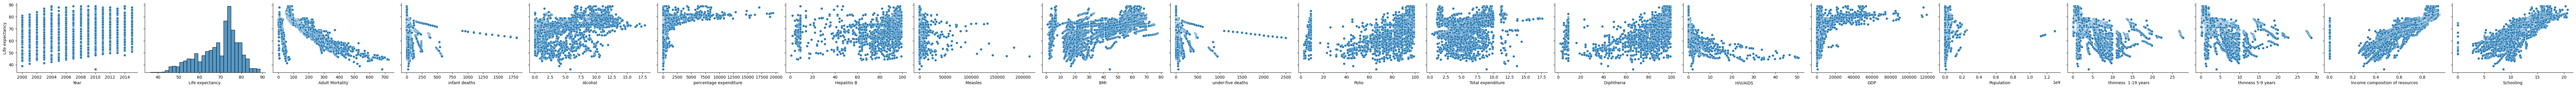

In [ ]:
sns.pairplot(
    df,
    y_vars='Life expectancy ',
    x_vars=df.select_dtypes(include=['float64', 'int64']).columns,
    kind="scatter",
    height= 5,
    aspect=1.5
)
plt.show()


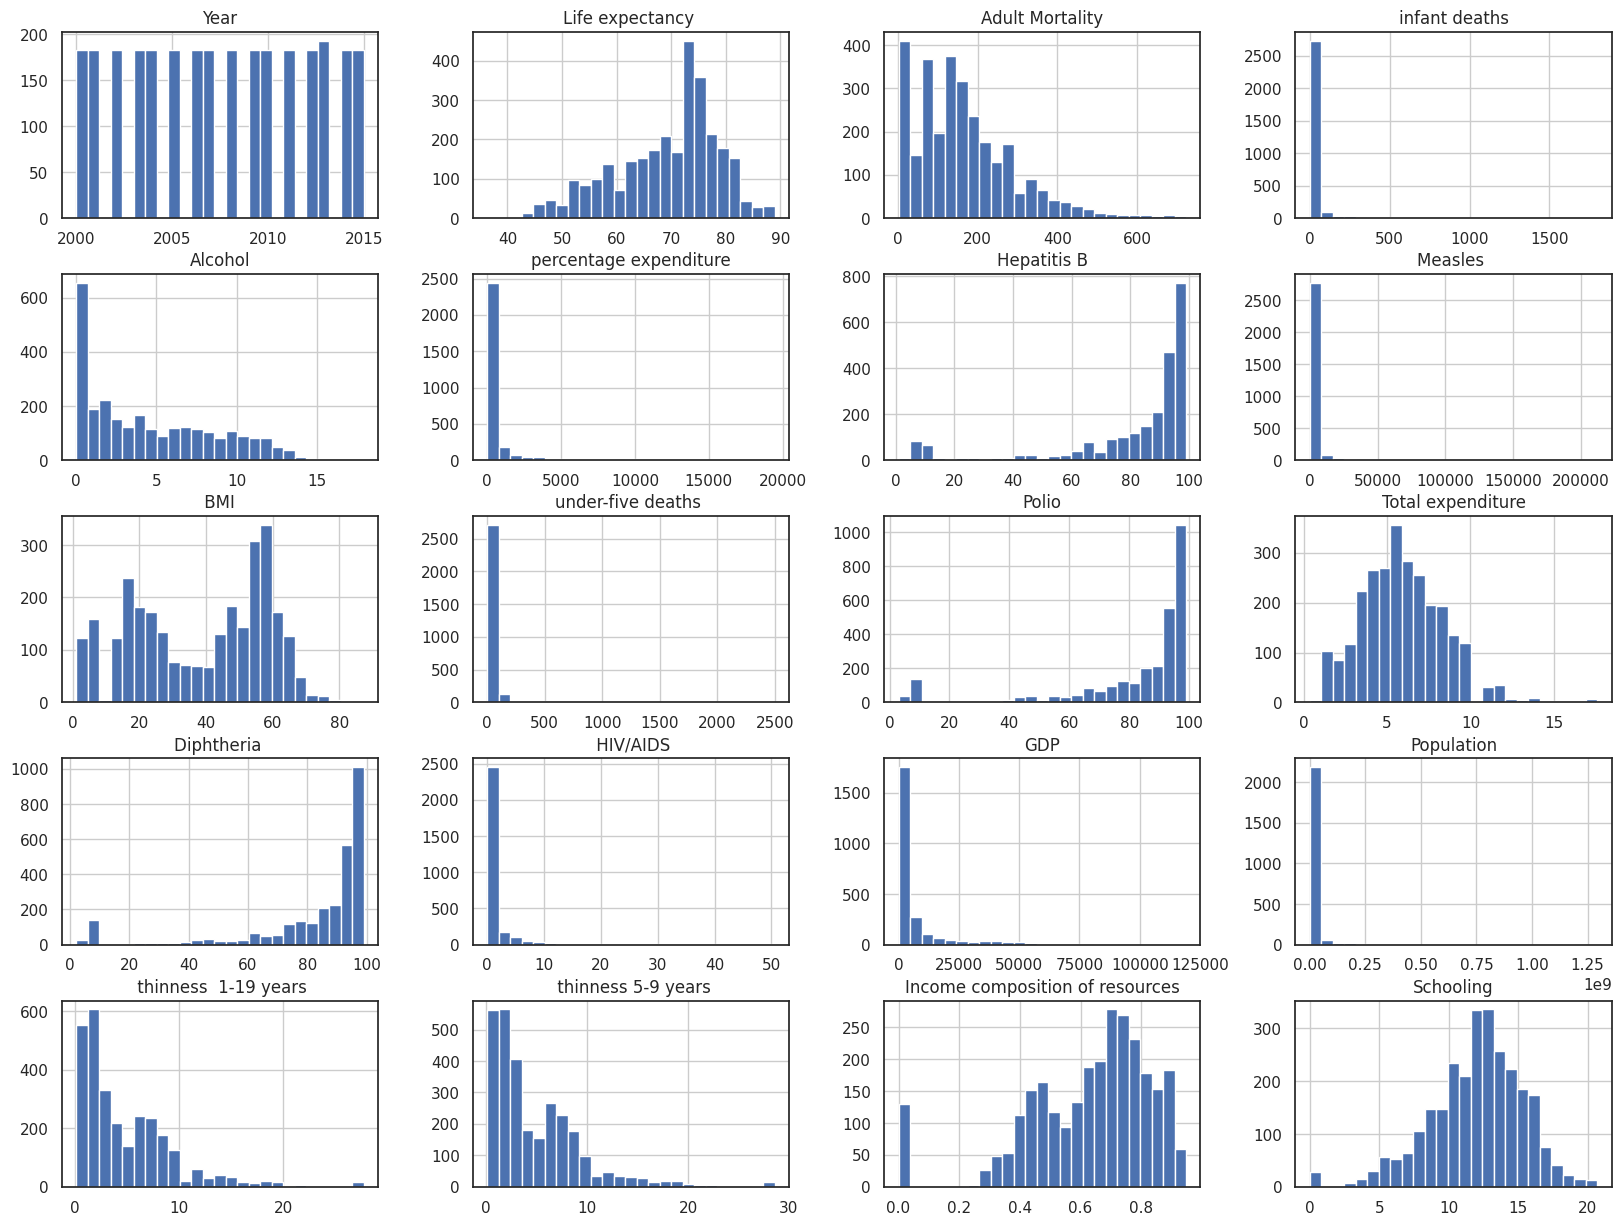

In [ ]:
df.hist(bins = 25, figsize = (20,15))
plt.show()

## Samples of further exploratory data analysis
### Examining life expectancy probability of developing and developed countries

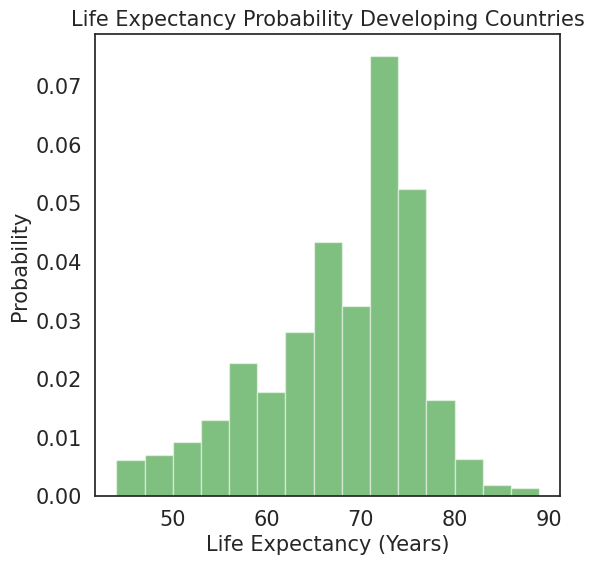

In [ ]:
df = pd.read_csv(
    filepath_or_buffer="LE.csv",
    sep=",", header=0
).dropna()
developing_data = df[df['Status'] == 'Developing']

hist_fig = plt.figure(figsize = (6,6))

n, bins, _ = plt.hist(
    developing_data["Life expectancy "], bins = 15,
    density = True, alpha = 0.5, color = "green"
)

plt.tick_params(labelsize=15)

_ = plt.title("Life Expectancy Probability Developing Countries", fontsize = 15)

_ = plt.ylabel("Probability", fontsize = 15)

_ = plt.xlabel("Life Expectancy (Years)", fontsize = 15)

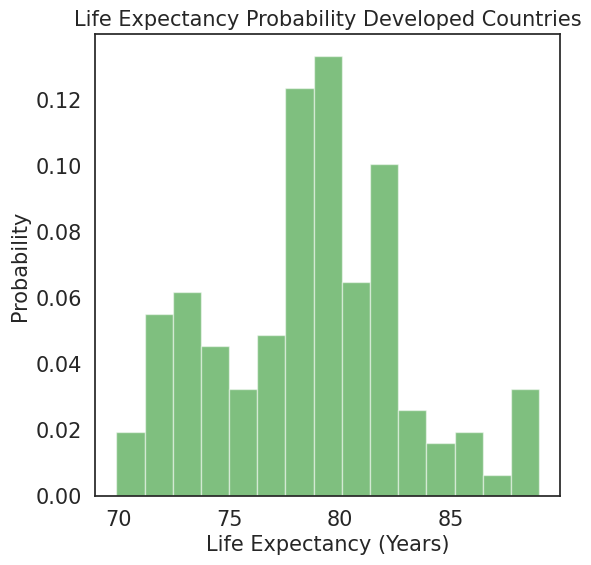

In [ ]:
df = pd.read_csv(
    filepath_or_buffer="LE.csv",
    sep=",", header=0
).dropna()
developing_data = df[df['Status'] == 'Developed']

hist_fig = plt.figure(figsize = (6,6))

n, bins, _ = plt.hist(
    developing_data["Life expectancy "], bins = 15,
    density = True, alpha = 0.5, color = "green"
)

plt.tick_params(labelsize=15)

_ = plt.title("Life Expectancy Probability Developed Countries", fontsize = 15)

_ = plt.ylabel("Probability", fontsize = 15)

_ = plt.xlabel("Life Expectancy (Years)", fontsize = 15)

#Data Cleaning



In [ ]:
df.dropna(inplace = True)

In [ ]:
df.drop(['Country','Status'], axis = 1, inplace = True)

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Life expectancy '])
y = df['Life expectancy ']
X.dropna()
y.dropna()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:


from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
df = imputer.fit_transform(df)

#Imputing all missing numerical values with the mean values


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

## First model with all features (Including categorical)
use of OneHotEncoder for categorical features

In [ ]:
numeric_features = ['Year', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
                    'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
                    'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
                    ' thinness 5-9 years', 'Income composition of resources', 'Schooling']
categorical_features = ['Country', 'Status']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


df_cleaned = df.dropna(subset=["Life expectancy "])

X = df_cleaned.drop("Life expectancy ", axis=1)
y = df_cleaned["Life expectancy "]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
df["Life expectancy "] = df["Life expectancy "].fillna(df["Life expectancy "].median())

X = df.drop("Life expectancy ", axis=1)
y = df["Life expectancy "]

lr.fit(X_train, y_train)

df_labels_prediction = lr.predict(X_test)

mse = mean_squared_error(y_test, df_labels_prediction)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, df_labels_prediction)

mse, rmse, mae




(3.868974373262094, 1.9669708623317463, 1.2312722093724382)

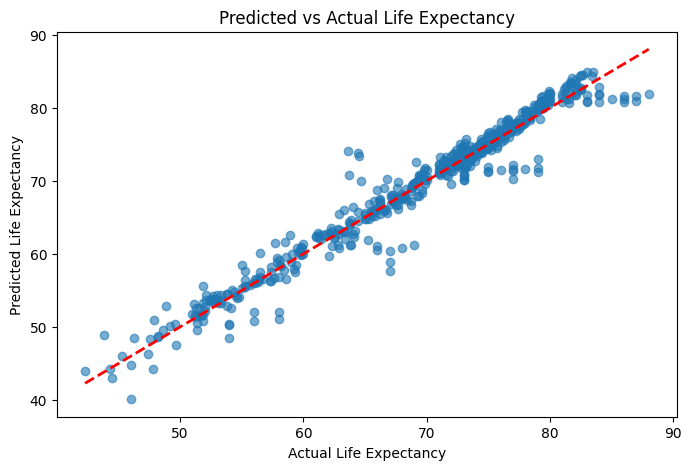

In [ ]:

plt.figure(figsize=(8, 5))
plt.scatter(y_test, df_labels_prediction, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Predicted vs Actual Life Expectancy')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.show()

Average Residual: -0.08606241272971797


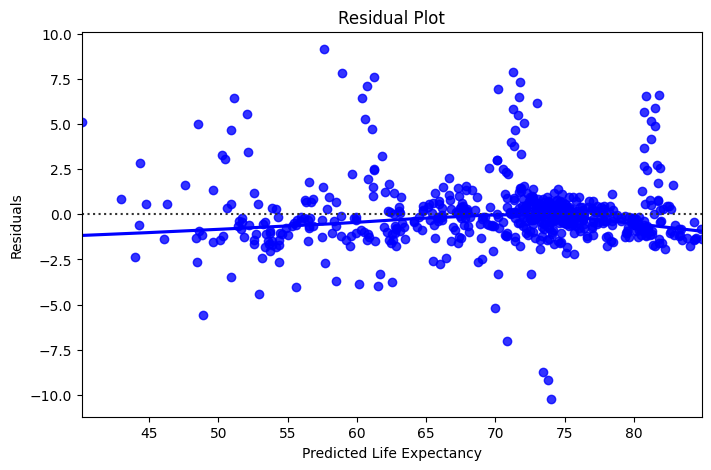

In [ ]:
residuals = y_test - df_labels_prediction

average_residual = np.mean(residuals)
print(f"Average Residual: {average_residual}")

plt.figure(figsize=(8, 5))
sns.residplot(x=df_labels_prediction, y=residuals, lowess=True, color="blue")
plt.title('Residual Plot')
plt.xlabel('Predicted Life Expectancy')
plt.ylabel('Residuals')
plt.show()


#Dropping highly correlated columns:
under 5 deaths, income composition of resources, percentage and total expenditure, thinness 5-9 years



In [ ]:
numeric_features = ['Year', 'Adult Mortality', 'infant deaths', 'Alcohol',
                    'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
                    'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
                    'Income composition of resources', 'Schooling']

'''
Dropping highly correlated columns:
under 5 deaths, income composition of resources, percentage and total expenditure, thinness 5-9 years
'''

categorical_features = ['Country', 'Status']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

lr1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

df_cleaned = df.dropna(subset=["Life expectancy "])
X = df_cleaned.drop("Life expectancy ", axis=1)
y = df_cleaned["Life expectancy "]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr1.fit(X_train, y_train)
df_labels_prediction1 = lr1.predict(X_test)

mse = mean_squared_error(y_test, df_labels_prediction1)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, df_labels_prediction1)

mse, rmse, mae


(3.103240827951777, 1.7616017790499012, 1.1665076597847979)

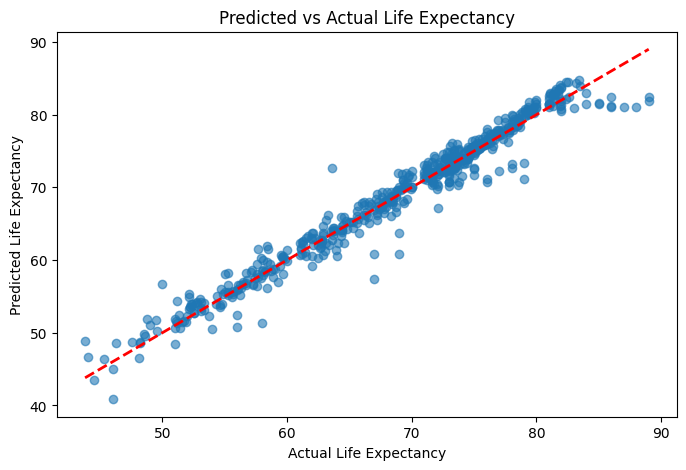

In [ ]:


plt.figure(figsize=(8, 5))
plt.scatter(y_test, df_labels_prediction1, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line (ideal predictions)
plt.title('Predicted vs Actual Life Expectancy')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.show()

Average Residual: -0.13082663725521607


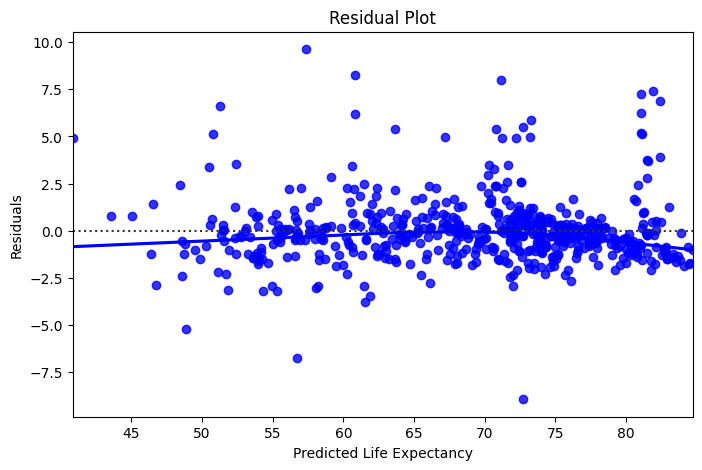

In [ ]:
residuals = y_test - df_labels_prediction1

average_residual = np.mean(residuals)
print(f"Average Residual: {average_residual}")
plt.figure(figsize=(8, 5))
sns.residplot(x=df_labels_prediction1, y=residuals, lowess=True, color="blue")
plt.title('Residual Plot')
plt.xlabel('Predicted Life Expectancy')
plt.ylabel('Residuals')
plt.show()

#PCA

In [ ]:
from sklearn.decomposition import PCA

numeric_features = ['Year', 'Adult Mortality', 'infant deaths', 'Alcohol',
                    'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
                    'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
                    'Income composition of resources', 'Schooling']
categorical_features = ['Country', 'Status']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=8))
])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

lr2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

df_cleaned2 = df.dropna(subset=["Life expectancy "])
X = df_cleaned2.drop("Life expectancy ", axis=1)
y = df_cleaned2["Life expectancy "]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr2.fit(X_train, y_train)

df_labels_prediction2 = lr2.predict(X_test)

mse = mean_squared_error(y_test, df_labels_prediction2)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, df_labels_prediction2)

mse, rmse, mae


(3.8815164184155737, 1.9701564451625595, 1.2609860764558427)

In [ ]:
pca_step = lr2.named_steps['preprocessor'].transformers_[0][1].named_steps['pca']

numeric_features_selected = numeric_features

print(numeric_features_selected)


['Year', 'Adult Mortality', 'infant deaths', 'Alcohol', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', 'Income composition of resources', 'Schooling']


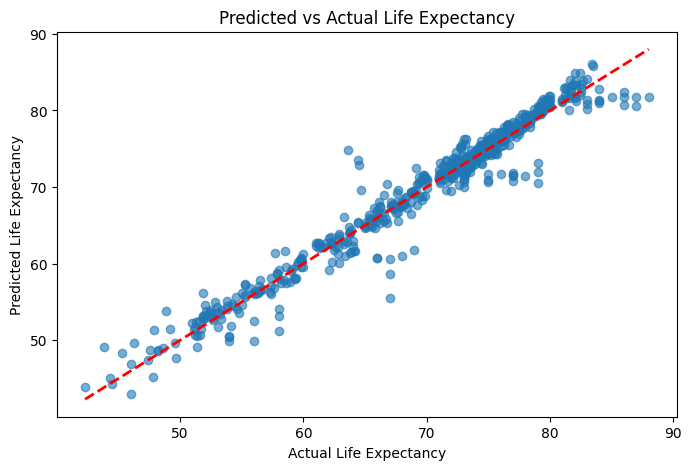

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, df_labels_prediction2, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line (ideal predictions)
plt.title('Predicted vs Actual Life Expectancy')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.show()


Average Residual: -0.052795702767895476


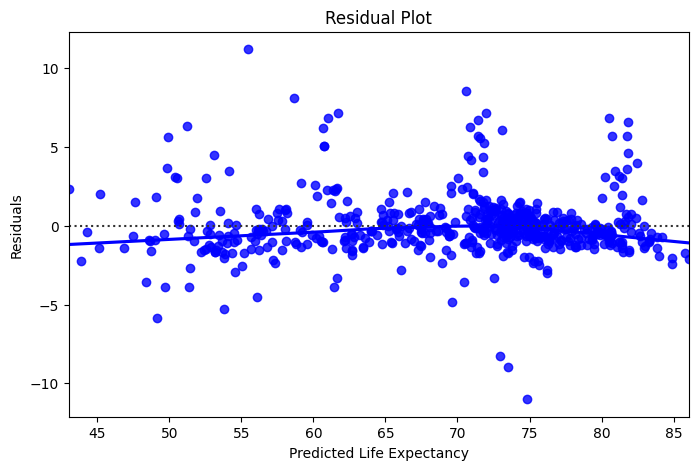

In [ ]:
residuals = y_test - df_labels_prediction2

average_residual = np.mean(residuals)
print(f"Average Residual: {average_residual}")

plt.figure(figsize=(8, 5))
sns.residplot(x=df_labels_prediction2, y=residuals, lowess=True, color="blue")
plt.title('Residual Plot')
plt.xlabel('Predicted Life Expectancy')
plt.ylabel('Residuals')
plt.show()


#Model with features highly correlated to life expectancy, but with low collinearity

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

numeric_features3 = ['Schooling', ' BMI ','Income composition of resources', 'Alcohol', 'Diphtheria ']

#Using the three highest graded predictors

categorical_features = ['Country', 'Status']


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features3),
        ('cat', categorical_transformer, categorical_features)
    ])

lr3 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


df_cleaned3 = df.dropna(subset=["Life expectancy "])
X = df_cleaned3.drop("Life expectancy ", axis=1)
y = df_cleaned3["Life expectancy "]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr3.fit(X_train, y_train)
df_labels_prediction3 = lr3.predict(X_test)

mse = mean_squared_error(y_test, df_labels_prediction3)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, df_labels_prediction3)

mse, rmse, mae

(5.853346906739512, 2.4193691133722264, 1.5685484005795118)

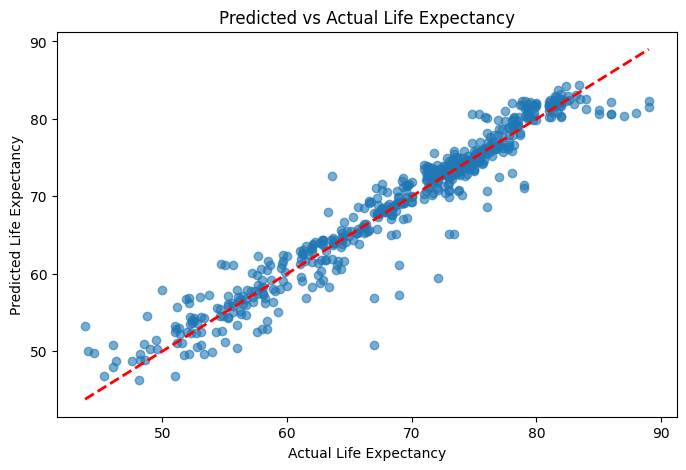

In [ ]:

plt.figure(figsize=(8, 5))
plt.scatter(y_test, df_labels_prediction3, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Predicted vs Actual Life Expectancy')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.show()


Average Residual: -0.09737896409714852


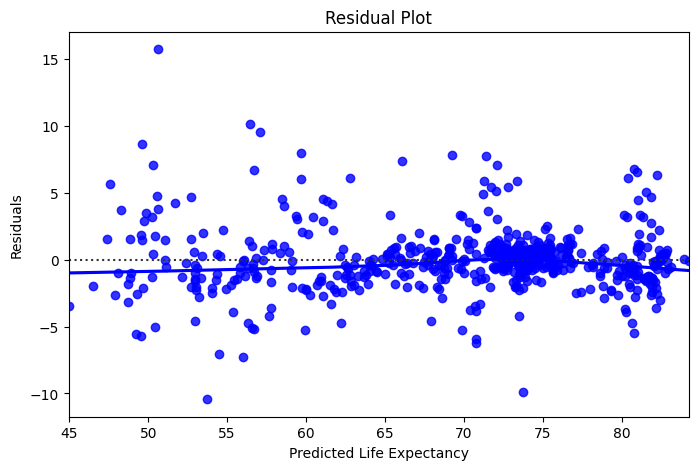

In [ ]:
residuals = y_test - df_labels_prediction3

average_residual = np.mean(residuals)
print(f"Average Residual: {average_residual}")

plt.figure(figsize=(8, 5))
sns.residplot(x=df_labels_prediction3, y=residuals, lowess=True, color="blue")
plt.title('Residual Plot')
plt.xlabel('Predicted Life Expectancy')
plt.ylabel('Residuals')
plt.show()


##Predictions

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state = 42)


In [ ]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
y_train = imputer.fit_transform(y_train)



In [ ]:
#Applying the Linear Regression Algorithm
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [ ]:
regression.coef_


array([[ 8.08841141e-01],
       [-8.78453896e+01],
       [-2.26837306e+01],
       [ 1.48884005e+00],
       [ 7.30167763e+02],
       [ 4.15398089e+00],
       [-1.91181956e+03],
       [ 1.11144886e+01],
       [-3.49697827e+01],
       [ 1.04578101e+01],
       [ 4.67259618e-01],
       [ 1.09274199e+01],
       [-2.93834992e+00],
       [ 5.50255760e+03],
       [-7.13256271e+05],
       [-2.05859708e+00],
       [-2.09475123e+00],
       [ 1.40384154e-01],
       [ 2.30520184e+00]])

In [ ]:
regression.intercept_

array([2.00753745e+03, 1.65824082e+02, 2.87931915e+01, 4.59327099e+00,
       7.20521353e+02, 8.11418106e+01, 2.31870340e+03, 3.85567800e+01,
       4.00944681e+01, 8.26939212e+01, 5.93618476e+00, 8.23767123e+01,
       1.78706383e+00, 7.38462347e+03, 1.19225437e+07, 4.80021524e+00,
       4.83826948e+00, 6.31084272e-01, 1.20281405e+01])

In [ ]:
mse, mae,rmse

(4.696317251963165, 1.3420408527042573, 2.1670988099214963)

In [ ]:
regression.predict(scaler.transform([[2000]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 2.17530644e+03, -1.80549761e+04, -4.67624283e+03,
         3.13406940e+02,  1.52171166e+05,  9.42756244e+02,
        -3.94228940e+05,  2.34391255e+03, -7.21330180e+03,
         2.25184211e+03,  1.02854693e+02,  2.34893089e+03,
        -6.07682447e+02,  1.14871945e+06, -1.36020337e+08,
        -4.22191868e+02, -4.29652872e+02,  2.97494207e+01,
         4.90170731e+02]])

#Decision Tree Regression

In [ ]:
df.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
from sklearn.tree import DecisionTreeRegressor

df = pd.DataFrame(df)
df.dropna(inplace = True)


X = df.drop(["Life expectancy "], axis=1)
y = df["Life expectancy "]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

from sklearn.tree import export_text
print(export_text(regressor, feature_names=list(X.columns)))

Mean Squared Error: 8.545454545454545
|--- Income composition of resources <= 0.56
|   |---  HIV/AIDS <= 1.65
|   |   |--- Adult Mortality <= 248.00
|   |   |   |--- Schooling <= 12.25
|   |   |   |   |--- Schooling <= 7.85
|   |   |   |   |   |--- Total expenditure <= 5.90
|   |   |   |   |   |   |--- percentage expenditure <= 31.05
|   |   |   |   |   |   |   |---  HIV/AIDS <= 0.60
|   |   |   |   |   |   |   |   |---  thinness  1-19 years <= 6.30
|   |   |   |   |   |   |   |   |   |---  BMI  <= 21.80
|   |   |   |   |   |   |   |   |   |   |--- Adult Mortality <= 215.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- Adult Mortality >  215.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [63.50]
|   |   |   |   |   |   |   |   |   |---  BMI  >  21.80
|   |   |   |   |   |   |   |   |   |   |---  thinness 5-9 years <= 2.05
|   |   |   |   |   |   |   |   |   |   |   |--- value: [65.80]
|   |   |   | 

#Random Forest Model

Mean Squared Error: 2.67
R-Squared Score: 0.97


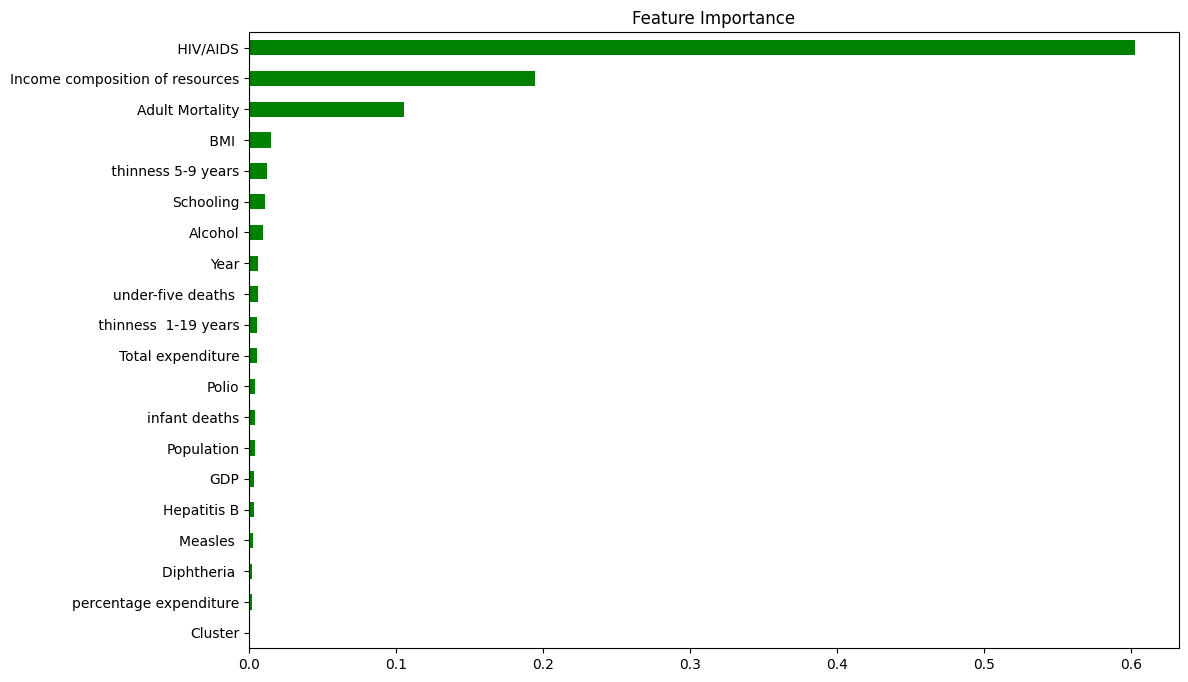

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df_cleaned = df.dropna(subset=["Life expectancy "])
X = df_cleaned.drop(["Life expectancy ", "Country", "Status"], axis=1)
y = df_cleaned["Life expectancy "]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-Squared Score: {r2:.2f}")

plt.figure(figsize=(12, 8))
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind="barh", color="Green")
plt.title("Feature Importance")
plt.show()


##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_features = ['Year', 'Adult Mortality', 'infant deaths', 'Alcohol',
                    'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
                    'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
                    'Income composition of resources', 'Schooling']

categorical_features = ['Country', 'Status']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

df_cleaned2 = df.dropna(subset=["Life expectancy "])
X = df_cleaned2.drop("Life expectancy ", axis=1)
y = df_cleaned2["Life expectancy "]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_pipeline.fit(X_train, y_train)
rf_predictions = rf_pipeline.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, rf_predictions)

print(f"MSE: {rf_mse}")
print(f"RMSE: {rf_rmse}")
print(f"MAE: {rf_mae}")


MSE: 3.499332172727276
RMSE: 1.870650200525816
MAE: 1.0887121212121242


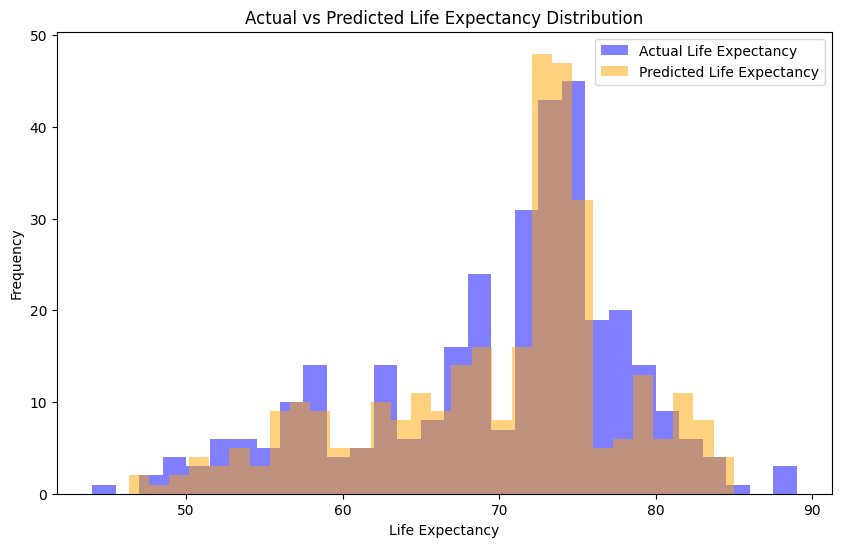

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(y_test, bins=30, alpha=0.5, label='Actual Life Expectancy', color='blue')
plt.hist(rf_predictions, bins=30, alpha=0.5, label='Predicted Life Expectancy', color='orange')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.title('Actual vs Predicted Life Expectancy Distribution')
plt.legend(loc='upper right')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


df = df.dropna()
X = df.drop(["Life expectancy ", "Country", "Status"], axis=1)
y = df["Life expectancy "]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 3.914574789272953
R² Score: 0.9448825985479216


In [ ]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


df = df.dropna()
X = df.drop(["Life expectancy ", "Country", "Status"], axis=1)
y = df["Life expectancy "]

from sklearn.preprocessing import KBinsDiscretizer
from imblearn.over_sampling import SMOTE

binning = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
y_binned = binning.fit_transform(y_train.values.reshape(-1, 1)).ravel()

smote = SMOTE(random_state=42)
X_resampled, y_resampled_binned = smote.fit_resample(X_train, y_binned)

y_resampled = binning.inverse_transform(y_resampled_binned.reshape(-1, 1)).ravel()

regressor = GradientBoostingRegressor(random_state=42)
regressor.fit(X_resampled, y_resampled)

y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 6.558679311940006
R² Score: 0.9076534796008383


##Decision Tree Classifier




In [ ]:
df2= df.drop(['Country', 'Status'], axis = 1)
df.dropna(inplace = True)
X=pd.DataFrame(df,columns= numeric_features)
X


,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
y=df['Life expectancy ']


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
from sklearn.tree import DecisionTreeClassifier
treeclassifier=DecisionTreeClassifier()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)

y_pred_tree = tree_regressor.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Mean Squared Error: {mse_tree:.2f}")
print(f"R-Squared Score: {r2_tree:.2f}")


Mean Squared Error: 4.70
R-Squared Score: 0.94


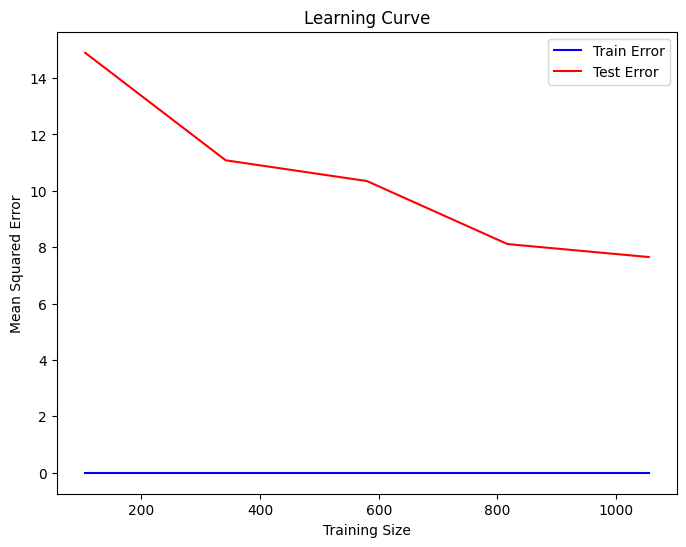

In [ ]:
from sklearn.model_selection import learning_curve
#Learning curve model

train_sizes, train_scores, test_scores = learning_curve(tree_regressor, X_train, y_train, cv=5, scoring="neg_mean_squared_error")

train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Train Error", color="blue")
plt.plot(train_sizes, test_mean, label="Test Error", color="red")
plt.title("Learning Curve")
plt.xlabel("Training Size")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()


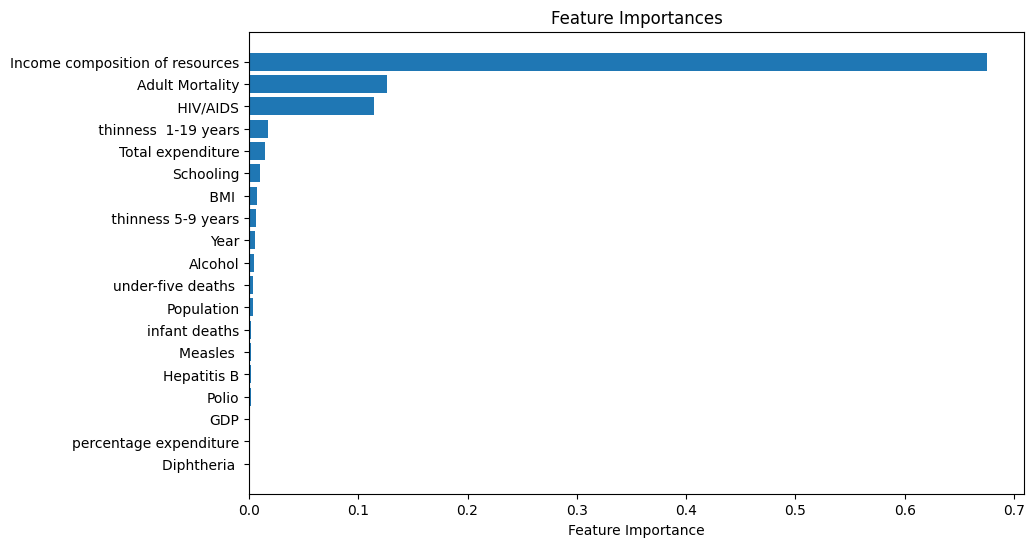

In [ ]:

#Feature Importance
importances = tree_regressor.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(len(importances)), importances[indices], align="center")
plt.yticks(range(len(importances)), [X_train.columns[i] for i in indices])
plt.xlabel("Feature Importance")
plt.show()


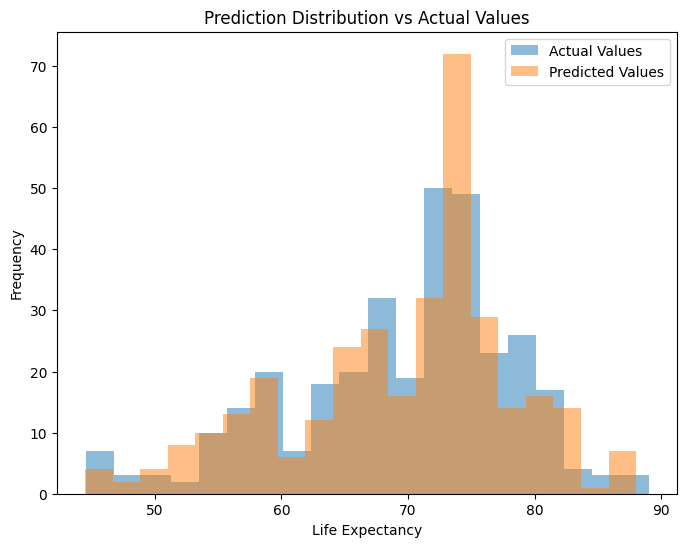

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(y_test, bins=20, alpha=0.5, label='Actual Values')
plt.hist(y_pred_tree, bins=20, alpha=0.5, label='Predicted Values')
plt.title("Prediction Distribution vs Actual Values")
plt.xlabel("Life Expectancy")
plt.ylabel("Frequency")
plt.legend()
plt.show()


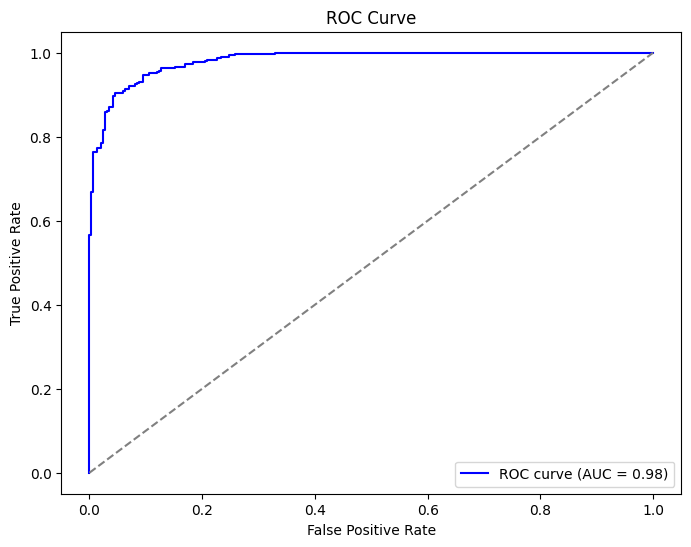

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

numeric_features = ['Year', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
                    'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
                    'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
                    ' thinness 5-9 years', 'Income composition of resources', 'Schooling']
categorical_features = ['Country', 'Status']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

threshold = df["Life expectancy "].median()
df["Life expectancy_class"] = (df["Life expectancy "] > threshold).astype(int)

df_cleaned_class = df.dropna(subset=["Life expectancy "])
X_class = df_cleaned_class.drop(["Life expectancy ", "Life expectancy_class"], axis=1)
y_class = df_cleaned_class["Life expectancy_class"]

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42
)

clf_pipeline.fit(X_train_class, y_train_class)

y_pred_prob = clf_pipeline.predict_proba(X_test_class)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_class, y_pred_prob)
roc_auc = roc_auc_score(y_test_class, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


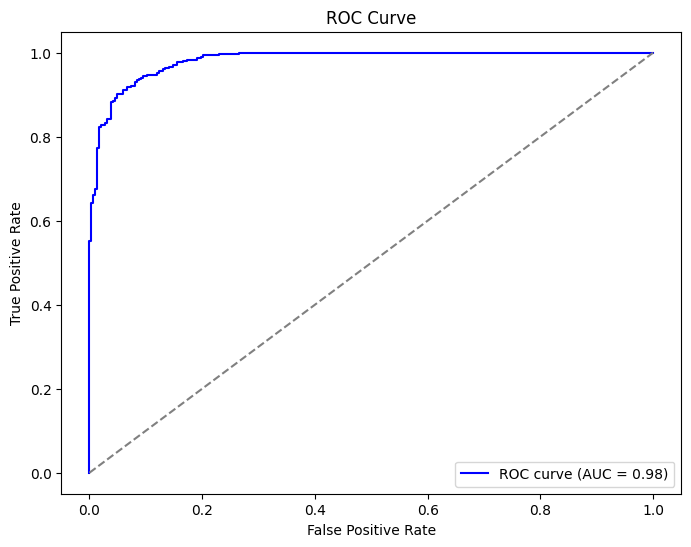

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

numeric_features = ['Year', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
                    'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
                    'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
                    ' thinness 5-9 years', 'Income composition of resources', 'Schooling']
categorical_features = ['Country', 'Status']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=8))
])


categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

threshold = df["Life expectancy "].median()
df["Life expectancy_class"] = (df["Life expectancy "] > threshold).astype(int)

df_cleaned_class = df.dropna(subset=["Life expectancy "])
X_class = df_cleaned_class.drop(["Life expectancy ", "Life expectancy_class"], axis=1)
y_class = df_cleaned_class["Life expectancy_class"]

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42
)

clf_pipeline.fit(X_train_class, y_train_class)

y_pred_prob = clf_pipeline.predict_proba(X_test_class)[:, 1]

fpr, tpr, thrzesholds = roc_curve(y_test_class, y_pred_prob)
roc_auc = roc_auc_score(y_test_class, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()
